<img style="float: left;" src="./eodata/geff/images/cemsf.png" width="100"/><img style="float: right;" src="./eodata/geff/images/icons.png" width="500"/>

# Global ECMWF Fire Forecasting

The European Centre for Medium-range Weather Forecasts ([ECMWF](https://www.ecmwf.int/)) produces daily fire danger forecasts and reanalysis products for the Copernicus Emergency Management Services ([CEMS](https://emergency.copernicus.eu/)). Activities are funded funded through a third-party agreement with the European Commission’s Joint Research Centre (JRC).

The modelling system that generates the fire data products is called Global ECMWF Fire Forecast ([GEFF](\href{https://git.ecmwf.int//projects/CEMSF/repos/geff/browse)) and it is based on the Canadian Fire Weather index as well as the US and Australian fire danger systems.

## Data overview

Fire danger data products:

- **geff-rt** provides the following *real-time* fire danger forecasts using weather forcings from the latest model cycle of the ECMWF’s Integrated Forecasting System (IFS):
    - high-resolution deterministic (~9 Km, with 10 days lead time) and 
    - lower-resolution probabilistic (~18Km, with 15 days lead time)
- **geff-re** provides historical records of global fire danger conditions (*reanalysis*) from 1980 to the present day. This dataset is updated as soon as new ERA-5 data becomes available (~2 months behind real-time) and it is made of four products:
    - deterministic model outputs (~28 Km),
    - probabilistic model outputs (made of 10 ensemble members, ~56 Km),
    - ensemble mean and
    - ensemble spread.
    
All of GEFF data products are under the Copernicus license, which provides users with free, full and open access to environmental data. Please note, the terms `GEFF data`, `EFFIS data` and `GWIS data` are considered synonyms and will be used interchangibly hereafter.

## Data availability

- **geff-rt** data can be requested through an online [form](https://effis.jrc.ec.europa.eu/applications/data-request-form/) and viewed using the following platforms: the European Forest Fire Information System ([EFFIS](https://effis.jrc.ec.europa.eu/static/effis_current_situation/public/index.html)) and the Global Wildfire Information System ([GWIS](https://gwis.jrc.ec.europa.eu/static/gwis_current_situation/public/index.html))
- **geff-re** is available through the Copernicus Climate Data Store ([CDS](https://cds.climate.copernicus.eu)).

## Event of interest: Attica (Greece) fires, 23-26 July 2018

For the purpose of this tutorial, all relevant global data is in the directory `./eodata/geff/global/` and local data is in `./eodata/geff/greece/`. 

#### Get the sample data from Zenodo

For educational purposes only, sample datasets are available on the [Zenodo wildfire community](https://zenodo.org/communities/wildfire). These samples provide a sneak peak into GEFF fire danger data.

Instructions:

1. Go to the Zenodo data repository: https://zenodo.org/

2. Click on 'Communities', then type 'Wildfire', then click on 'View'. The page should list several datasets.

3. Click on 'Fire Weather Index - ERA5 HRES', scroll down and download the 'fwi.nc' file.

4. Go back to the 'Wildfire' community page. Click on 'Global ECMWF Fire Forecasting system - sample data for wildfires in Attica (Greece) on 23-26 July 2018' (https://doi.org/10.5281/zenodo.3784753)

    a. Scroll down and click on the 'Download' button next to the following tar files (it may take a while):
    
        - ECMWF_EFFIS_20180723_1200_en.tar
        - ECMWF_EFFIS_20180723_1200_hr.tar
        - ECMWF_EFFIS_20180723-26_1200_hr_e5.tar
        - ECMWF_EFFIS_20180723-26_1200_en_e5.tar
    
    b. Extract the tar files in your working directory.

### Background
A series of wildfires in Greece, during the 2018 European heat wave, began in the coastal areas of Attica in July 2018. As of May 2019, 102 people were confirmed dead. Over 700 residents have been evacuated or rescued, mainly from the seaside settlements located north of the port town of Rafina, namely Kokkino Limanaki and Mati. Μore than 4,000 residents were affected by the wildfires. Greece deployed its entire fleet of fire-fighting aircraft and more than 250 fire engines, as well as over 600 firefighters. The Greek prime minister Alexis Tsipras declared a state of emergency in Attica. Many countries worldwide helped or offered aid to Greece. Government minister Nikos Toskas has suggested that there is evidence that arson may have been a cause of the fires in Mati. The first fire was ignited on 23rd July.
(Source: https://en.wikipedia.org/wiki/2018_Attica_wildfires).

### Active fires
Most of the active fires detected by the MODIS instruments was in the far west of Attica, close to the border with Corinthia, with a weaker signal detected in the eastern coastal region of Attica on 23/24 July.

In [1]:
# First of all, we need to import the necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

# Enable inline displaying of plots
%matplotlib inline

/home/claudia/.local/lib/python3.6/site-packages/pandas/compat/_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


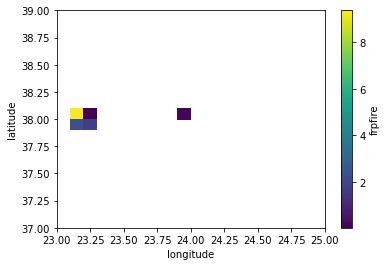

In [2]:
# Where did the fire actually occur?
# Let's download Fire Radiative Power from CAMS GFAS: https://apps.ecmwf.int/datasets/data/cams-gfas/

# Open fire radiative power dataset
frp = xr.open_dataset("./eodata/geff/global/frp_20180701-31.nc")
# Data have global coverage and are bundled in monthly datacubes, we will need to slice in time and space
frp = frp.loc[dict(time = slice('2018-07-23', '2018-07-26'), latitude = slice(39, 37), longitude = slice(23, 25))]
frp = frp.frpfire.mean(dim = "time")
# Plot mean frpfire array
frp.where(frp > 0).plot();

### Fire Danger Forecasts
Attica is characterised by very high temperatures in July (average temperature is 27°C, typical range is 22-32°C). On the day of the event, the FWI exceeded the extreme danger threshold in central Attica. In particular the areas where fires where ignited, were all characterised by very high fire danger. Compared to the climatology, the fire weather fell between the 90th and the 98th percentile, reaching significantly positive anomalies. The dangerous fire weather that characterised Attica was forecast-able 10 days ahead, according to the HRES. The ENS forecast, however, was characterised by a large spread in the distribution. In the fire affected areas the number of ensemble members exceeding the very high danger threshold was in the range 15-20%.

The tutorials in this series will showcase how to use GEFF/EFFIS data to reproduce the above assessment. For convenience, a schematic representation of the forecast issue dates and leadtimes is provided in the table below ([link to spreadsheet](https://docs.google.com/spreadsheets/d/1o-b4i8hiiNF5_I-L4GbBECA01Pf-0bwtPGJH_WzCn-M/edit?usp=sharing)).

![schematic](./eodata/geff/images/screenshot-docs.google.com-2020.05.07-10_43_55.png)

## Explore the data

In this section we show how to load GEFF datasets and explore the content. We will touch briefly on the different spatial resolutions of each datasets and related implications (e.g. different land-sea mask -> different spatial coverage).

### geff-rt: fire danger forecasts

The GEFF model uses weather forcings from the ECMWF’s Integrated Forecasting System (IFS) to generate fire danger forecasts. Based on the date of a particular event (e.g. 23-26 July 2018) we can find out what IFS model cycle was used, in this case it was 45r1.

![IFS model cycles](./eodata/geff/images/IFS_model_cycles.png)

#### HRES forecast

This dataset provides real-time high-resolution deterministic (~9 Km) fire danger forecasts up to 10 days ahead. Let us explore the content of the sample file.

In [3]:
# Open the dataset
ds_rt_hr = xr.open_dataset("./eodata/geff/global/rt_hr/ECMWF_FWI_20180723_1200_hr.nc")
ds_rt_hr

<xarray.Dataset>
Dimensions:      (lat: 2560, lon: 5120, time: 10)
Coordinates:
  * lon          (lon) float32 0.0 0.0703125 0.140625 0.2109375 0.28125 ...
  * lat          (lat) float32 89.94619 89.87648 89.80636 89.736145 89.66589 ...
  * time         (time) datetime64[ns] 2018-07-23 2018-07-24 2018-07-25 ...
Data variables:
    fwi          (time, lat, lon) float32 ...
    ffmc         (time, lat, lon) float32 ...
    dmc          (time, lat, lon) float32 ...
    dc           (time, lat, lon) float32 ...
    isi          (time, lat, lon) float32 ...
    bui          (time, lat, lon) float32 ...
    dsr          (time, lat, lon) float32 ...
    danger_risk  (time, lat, lon) float32 ...
Attributes:
    CDI:               Climate Data Interface version 1.8.2 (http://mpimet.mp...
    Conventions:       CF-1.6
    Reference date:    20180723
    ECMWF fire model:  2.2
    Lincense:          Copernicus
    version:           2.2
    CDO:               Climate Data Operators version 1.8.2 

This dataset has three dimensions: latitude, longitude and time. In the lat/long plane data are distributed on a regular grid (2560 x 5120), while the time dimension is made of 10 levels (each corresponds to a daily forecast estimate). Each cell of this datacube contains only 8 variables: fwi, ffmc, dmc, dc, isi, bui, dsr, danger_risk. 

To plot and run basic operations, it is convenient to convert the dataset to a dataarray by extracting 1 variable, e.g. fwi. 

Remember: 
- DataArray = single multi-dimensional variable and its coordinates
- Dataset = holds multiple variables that potentially share the same coordinates.

In [4]:
# Convert ds to a dataarray extracting only the variable fwi
da_rt_hr = ds_rt_hr.fwi
da_rt_hr

<xarray.DataArray 'fwi' (time: 10, lat: 2560, lon: 5120)>
[131072000 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 0.0 0.0703125 0.140625 0.2109375 0.28125 ...
  * lat      (lat) float32 89.94619 89.87648 89.80636 89.736145 89.66589 ...
  * time     (time) datetime64[ns] 2018-07-23 2018-07-24 2018-07-25 ...
Attributes:
    units:    -
    title:    Fire Weather Index

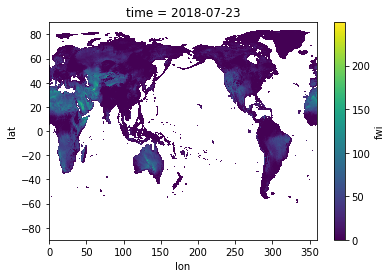

In [5]:
# Plot the first day
da_rt_hr[0].plot();

#### ENS forecast

This dataset provides real-time probabilistic (~18 Km) fire danger forecasts up to 10 days ahead. Each member of the ensemble has similar structure to the HRES but lower resolution.

In [6]:
# Open the dataset
ds_rt_en = xr.open_dataset("./eodata/geff/global/rt_en/ECMWF_FWI_20180723/ECMWF_FWI_20180723_1200_00.nc")
ds_rt_en

<xarray.Dataset>
Dimensions:      (lat: 1280, lon: 2560, time: 10)
Coordinates:
  * lon          (lon) float32 0.0 0.140625 0.28125 0.421875 0.5625 0.703125 ...
  * lat          (lat) float32 89.892395 89.753006 89.61279 89.47239 ...
  * time         (time) datetime64[ns] 2018-07-23 2018-07-24 2018-07-25 ...
Data variables:
    fwi          (time, lat, lon) float32 ...
    ffmc         (time, lat, lon) float32 ...
    dmc          (time, lat, lon) float32 ...
    dc           (time, lat, lon) float32 ...
    isi          (time, lat, lon) float32 ...
    bui          (time, lat, lon) float32 ...
    dsr          (time, lat, lon) float32 ...
    danger_risk  (time, lat, lon) float32 ...
Attributes:
    CDI:               Climate Data Interface version 1.8.2 (http://mpimet.mp...
    Conventions:       CF-1.6
    Reference date:    20180723
    ECMWF fire model:  2.2
    Lincense:          Copernicus
    version:           2.2
    CDO:               Climate Data Operators version 1.8.2 (ht

In [7]:
# Convert ds to a dataarray extracting only the variable fwi
da_rt_en = ds_rt_en.fwi
da_rt_en

<xarray.DataArray 'fwi' (time: 10, lat: 1280, lon: 2560)>
[32768000 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 0.0 0.140625 0.28125 0.421875 0.5625 0.703125 ...
  * lat      (lat) float32 89.892395 89.753006 89.61279 89.47239 89.33192 ...
  * time     (time) datetime64[ns] 2018-07-23 2018-07-24 2018-07-25 ...
Attributes:
    units:    -
    title:    Fire Weather Index

This dataset is, again, a datacube with three dimensions: latitude, longitude and time. In the lat/long plane data are distributed on a smaller regular grid (1280 x 2560) compared to the HRES forecast.

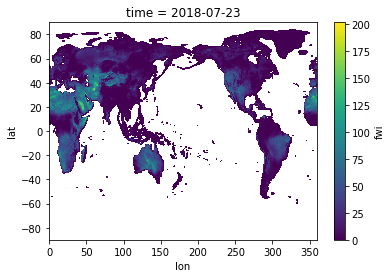

In [8]:
# Plot the first day
da_rt_en[0].plot();

The difference in lower resolution is not evident at this scale, but it will become evident when we explore the same dataset cropped over Attica (Greece).

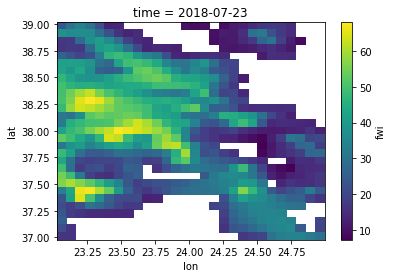

In [9]:
# Crop over area of interest, note lat = slice(top, bottom), lon = slice(left, right)!
# Use this service to get coordinates: https://boundingbox.klokantech.com/
fwi_rt_hr = da_rt_hr.loc[dict(lat = slice(39, 37), lon = slice(23, 25))]
fwi_rt_hr[0].plot();

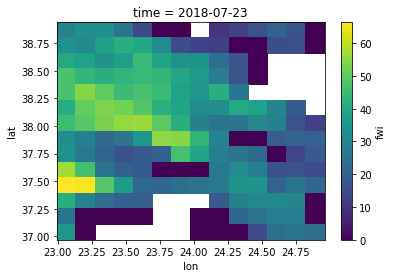

In [10]:
# Crop over area of interest, note lat = slice(top, bottom), lon = slice(left, right)!
# Use this service to get coordinates: https://boundingbox.klokantech.com/
fwi_rt_en = da_rt_en.loc[dict(lat = slice(39, 37), lon = slice(23, 25))]
fwi_rt_en[0].plot();

### geff-re: ERA5 based reanalysis of the Fire Weather Index

This dataset provides historical records of global fire danger conditions from 1980 to the present day and it is made of two main types of products: (i) deterministic model outputs (HRES reanalysis), (ii) probabilistic model outputs (made of 10 ensemble members, ENS reanalysis). It is updated as soon as new ERA5 data becomes available (~2 months behind real-time). 

A single reanalysis layer is often used as proxy for observations (e.g. for validating the forecasts). Stacking together consecutive reanalysis estimates, allows to compute temporal trends and other long term statistics.

#### HRES reanalysis

Let's repeat the same operations shown above, this time the dataset has only 1 temporal layer.
The regular grid is smaller (640 x 1280) compared to the HRES/ENS forecasts.

The example below shows how to explore the single layer reanalysis. Examples of how to use a reanalysis datacube will be shown in follow-up tutorials.

In [11]:
# Open the dataset
ds_e5_hr = xr.open_dataset("./eodata/geff/global/e5_hr/ECMWF_FWI_20180723_1200_hr.nc")
ds_e5_hr

<xarray.Dataset>
Dimensions:      (lat: 640, lon: 1280, time: 1)
Coordinates:
  * time         (time) datetime64[ns] 2018-07-23
  * lon          (lon) float32 0.0 0.28125 0.5625 0.84375 1.125 1.40625 ...
  * lat          (lat) float32 89.784874 89.5062 89.22588 88.94519 88.66436 ...
Data variables:
    fwi          (time, lat, lon) float32 ...
    ffmc         (time, lat, lon) float32 ...
    dmc          (time, lat, lon) float32 ...
    dc           (time, lat, lon) float32 ...
    isi          (time, lat, lon) float32 ...
    bui          (time, lat, lon) float32 ...
    dsr          (time, lat, lon) float32 ...
    danger_risk  (time, lat, lon) float32 ...
Attributes:
    CDI:               Climate Data Interface version 1.9.5 (http://mpimet.mp...
    Conventions:       CF-1.6
    Reference date:    20180723
    ECMWF fire model:  3.0
    Lincense:          Copernicus
    version:           3.0
    CDO:               Climate Data Operators version 1.9.5 (http://mpimet.mp...
    hist

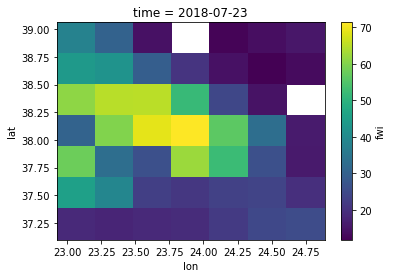

In [12]:
# Convert ds to a dataarray extracting only the variable fwi
da_e5_hr = ds_e5_hr.fwi
fwi_e5_hr = da_e5_hr.loc[dict(lat = slice(39, 37), lon = slice(23, 25))]
fwi_e5_hr[0].plot();

#### ENS reanalysis

Let us repeat the same operations shown above, one last time. The ENS reanalysis dataset of each ensemble member is similar to the HRES reanalysis but the with an even coarser regular grid (320 x 640).

In [13]:
# Open the dataset
ds_e5_en = xr.open_dataset("./eodata/geff/global/e5_en/ECMWF_FWI_20180723/ECMWF_FWI_20180723_1200_00.nc")
ds_e5_en

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 640, time: 1)
Coordinates:
  * time         (time) datetime64[ns] 2018-07-23
  * lon          (lon) float32 0.0 0.5625 1.125 1.6875 2.25 2.8125 3.375 ...
  * lat          (lat) float32 89.57009 89.013176 88.45297 87.89203 87.3308 ...
Data variables:
    fwi          (time, lat, lon) float32 ...
    ffmc         (time, lat, lon) float32 ...
    dmc          (time, lat, lon) float32 ...
    dc           (time, lat, lon) float32 ...
    isi          (time, lat, lon) float32 ...
    bui          (time, lat, lon) float32 ...
    dsr          (time, lat, lon) float32 ...
    danger_risk  (time, lat, lon) float32 ...
Attributes:
    CDI:               Climate Data Interface version 1.9.5 (http://mpimet.mp...
    Conventions:       CF-1.6
    Reference date:    20180723
    ECMWF fire model:  3.0
    Lincense:          Copernicus
    version:           3.0
    CDO:               Climate Data Operators version 1.9.5 (http://mpimet.mp...
    hist

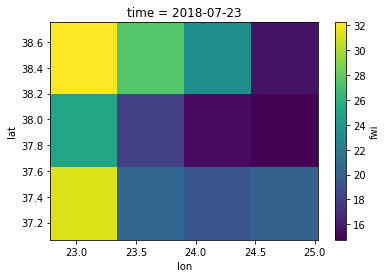

In [14]:
da_e5_en = ds_e5_en.fwi
fwi_e5_en = da_e5_en.loc[dict(lat = slice(39, 37), lon = slice(23, 25))]
fwi_e5_en[0].plot();

To get an idea of how different the 10 ensemble realisations are, we can look are the mean and spread (standard deviation) of the ensemble.

In [15]:
# Let's first find the files corresponding containing the FWI indices
dir = "./eodata/geff/global/e5_en/ECMWF_FWI_20180723/"
pattern = "ECMWF_FWI"
matching_files = [f for f in os.listdir(dir) if pattern in f]
matching_files

['ECMWF_FWI_20180723_1200_06.nc',
 'ECMWF_FWI_20180723_1200_03.nc',
 'ECMWF_FWI_20180723_1200_08.nc',
 'ECMWF_FWI_20180723_1200_04.nc',
 'ECMWF_FWI_20180723_1200_05.nc',
 'ECMWF_FWI_20180723_1200_00.nc',
 'ECMWF_FWI_20180723_1200_01.nc',
 'ECMWF_FWI_20180723_1200_02.nc',
 'ECMWF_FWI_20180723_1200_09.nc',
 'ECMWF_FWI_20180723_1200_07.nc']

Note that for the purpose of calculating mean and spread, the order in which files are listed in not important!

In [16]:
# Now we extract fwi from each file, crop over Attica and concatenate the layers in a datacube

# Initialise empty list
fwi = []
for filename in matching_files:
    full_path = os.path.join(dir, filename)
    # Open the dataset
    ds = xr.open_dataset(full_path)
    # Convert to dataarray by extractinf fwi
    da = ds.fwi
    # Crop over Attica
    layer = da.loc[dict(lat = slice(39, 37), lon = slice(23, 25))]
    # Append
    fwi.append(layer)
    
combined = xr.concat(fwi, dim = 'time')
combined

<xarray.DataArray 'fwi' (time: 10, lat: 3, lon: 4)>
array([[[32.22624 , 30.856443, 27.044855, 17.050581],
        [26.212416, 20.507957, 17.77196 , 15.778754],
        [29.346165, 21.778257, 22.118362, 23.07752 ]],

       [[30.796589, 27.270647, 22.002693, 14.722291],
        [25.160019, 19.930038, 17.197914, 15.028749],
        [30.899532, 21.402328, 20.882746, 21.569597]],

       [[31.056591, 28.60585 , 24.118923, 16.440517],
        [24.995966, 17.77584 , 16.201256, 13.162543],
        [29.273064, 18.935133, 19.620148, 19.981894]],

       [[35.2339  , 32.539154, 26.012497, 17.063728],
        [26.072706, 19.440876, 16.1348  , 15.99126 ],
        [29.851995, 19.529465, 19.580582, 21.41345 ]],

       [[31.745092, 28.912397, 24.311544, 17.068493],
        [23.246479, 18.37367 , 17.433662, 15.528998],
        [27.256971, 18.203241, 20.181372, 22.863895]],

       [[32.25161 , 27.503012, 23.357252, 15.581   ],
        [25.044817, 18.038017, 15.267973, 14.75343 ],
        [31.245638, 

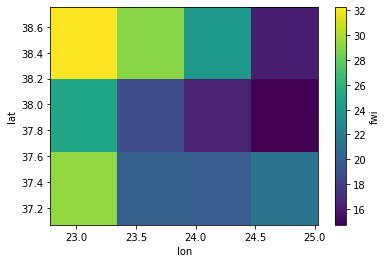

In [17]:
# Calculate mean, then plot
mean_fwi = combined.mean(dim = "time")
mean_fwi.plot()

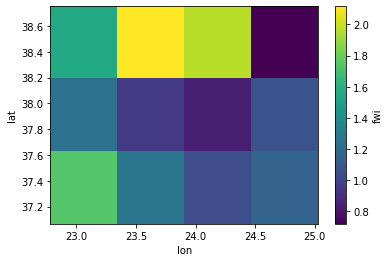

In [18]:
# Calculate spread (standard deviation), then plot
std_fwi = combined.std(dim = "time")
std_fwi.plot()

In the next tutorials we will skip over the operations above, as sample data are provided already cropped to the region of interest. Also ensemble mean and spread can be requested directly from the data provider. 